# Лаба 2

In [337]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft

In [338]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

# Задаем начальные параметры

In [339]:
T = 5
N = 10**4
t = np.linspace(0, T, N)

## Функция нормализованных функций Баттерворта

In [340]:
def H(f: np.array, n: int) -> np.array:
    H = np.ones_like(f, dtype=complex)
    for k in range(n // 2):
        a = np.sin(np.pi * (2*k + 1) / (2 * n))
        p_k = - f ** 2 + 2j * a * f + 1
        H = H / p_k
    if n % 2 == 1:
        H = H / (1j * f + 1)

    return H

## *Зависимость фильтра от порядка*

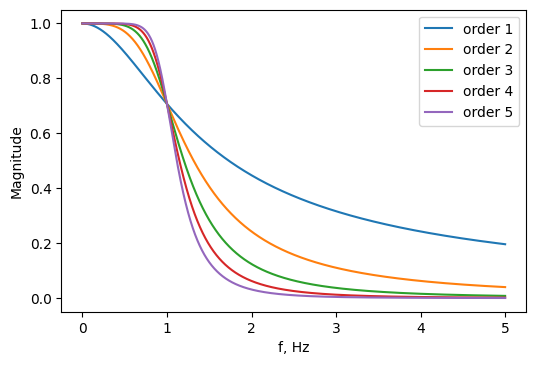

In [341]:
plt.xlabel("f, Hz")
plt.ylabel("Magnitude")
for i in range(1, 6):
    plt.plot(t, np.abs(H(t, i)), label="order %d" % i)
plt.legend(loc='best')

## Функция ФНЧ

In [342]:
def LPF(f, cutoff, order):
    half = H(f[:t.size // 2] / cutoff, order)
    return np.concatenate((half, np.flip(half)))

### Утилитная функция, чтобы было красивее

In [343]:
def prettify(f):
    f1, f2 = np.split(f, 2)
    return np.concatenate([f2, f1])

## *Тестируем на двух синусах с разными частотами*

In [344]:
f0 = 1  # Hz
fs = 100  # freq_sample
MaxTime = 5  # s
NumOfSamples = int(np.floor(MaxTime * fs))
t = np.linspace(0, MaxTime, NumOfSamples)
x = np.sin(2 * np.pi * f0 * t) + np.sin(2 * np.pi * 10 * f0 * t)

Text(0.5, 0, 'f, Hz')

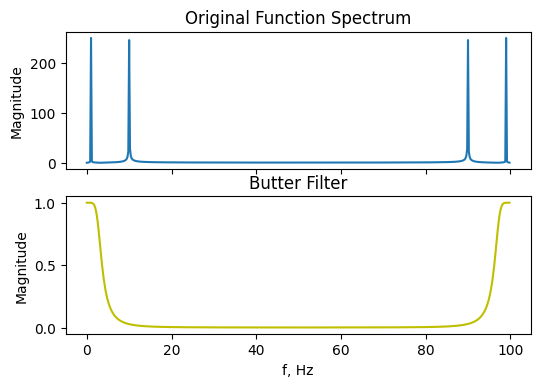

In [345]:
X = np.fft.fft(x)
f = np.arange(NumOfSamples) * fs / NumOfSamples

H_lpf = LPF(f, 3 * f0, 3)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].set_title("Original Function Spectrum")
ax[0].plot(f, (np.abs(X)))

ax[1].set_title("Butter Filter")
ax[1].plot(f, (np.abs(H_lpf)), 'y')
ax[0].set_ylabel('Magnitude')
ax[1].set_ylabel('Magnitude')
ax[1].set_xlabel('f, Hz')

## Применим фильтр

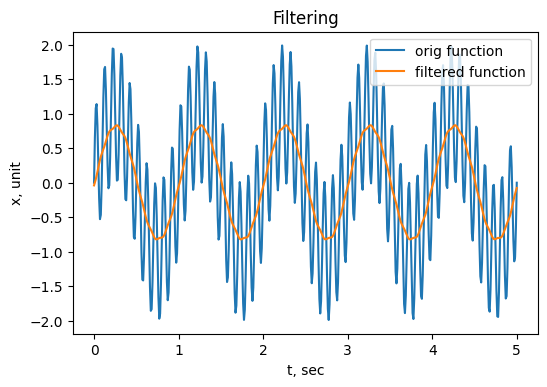

In [346]:
Y = H_lpf * X
y = np.real(np.fft.ifft(Y))
plt.title('Filtering')
plt.xlabel("t, sec")
plt.ylabel("x, unit")
plt.plot(t, x, label='orig function')
plt.plot(t, y, label='filtered function')
plt.legend(loc='best')

## Функция ФВЧ

In [347]:
def HPF(f, cutoff, order):
    half = np.concatenate((np.zeros(1), H(cutoff / f[1:f.size // 2], order)))
    return np.concatenate((half, np.flip(half)))

## *так же тестируем ФВЧ*

Text(0.5, 0, 'f, Hz')

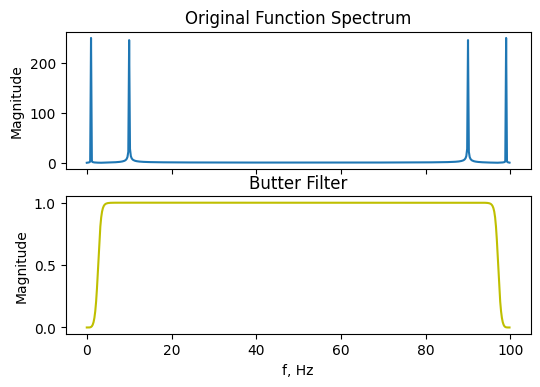

In [349]:
X = np.fft.fft(x)
f = np.arange(NumOfSamples) * fs / NumOfSamples

H_hpf = HPF(f, 3 * f0, 5)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].set_title("Original Function Spectrum")
ax[0].plot(f, (np.abs(X)))

ax[1].set_title("Butter Filter")
ax[1].plot(f, (np.abs(H_hpf)), 'y')
ax[0].set_ylabel('Magnitude')
ax[1].set_ylabel('Magnitude')
ax[1].set_xlabel('f, Hz')

## Применим фильтр

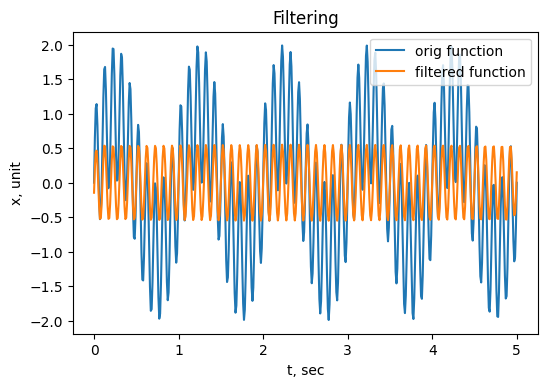

In [350]:
Y = H_hpf * X
y = np.real(np.fft.ifft(Y))
plt.title('Filtering')
plt.xlabel("t, sec")
plt.ylabel("x, unit")
plt.plot(t, x, label='orig function')
plt.plot(t, y, label='filtered function')
plt.legend(loc='best')

## Сделаем полосовой и режекторный используя ФНЧ и ФВЧ

In [351]:
def BPF(f, cutoff1, cutoff2, order):
    return LPF(f, cutoff2, order) * HPF(f, cutoff1, order)

def TF(f, cutoff1, cutoff2, order):
    return LPF(f, cutoff1, order) + HPF(f, cutoff2, order)

## Полосовой 

## На трех гармониках с частотами 1 : 10 : 15


Text(0.5, 0, 'f, Hz')

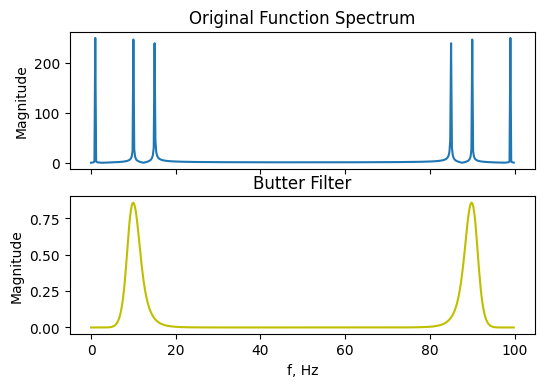

In [352]:
x = np.sin(2 * np.pi * f0 * t) + np.sin(2 * np.pi * 10 * f0 * t) + np.sin(2 * np.pi * 15 * f0 * t)
X = np.fft.fft(x)
f = np.arange(NumOfSamples) * fs / NumOfSamples

H_bpf = BPF(f, 9 * f0, 11*f0, 9)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].set_title("Original Function Spectrum")
ax[0].plot(f, (np.abs(X)))

ax[1].set_title("Butter Filter")
ax[1].plot(f, (np.abs(H_bpf)), 'y')
ax[0].set_ylabel('Magnitude')
ax[1].set_ylabel('Magnitude')
ax[1].set_xlabel('f, Hz')

## *как видим, осталась одна гармоника*

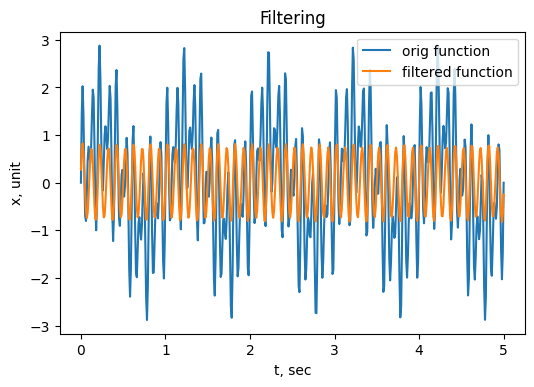

In [353]:
Y = H_bpf * X
y = np.real(np.fft.ifft(Y))
plt.title('Filtering')
plt.xlabel("t, sec")
plt.ylabel("x, unit")
plt.plot(t, x, label='orig function')
plt.plot(t, y, label='filtered function')
plt.legend(loc='best')

## Режекторный

Text(0.5, 0, 'f, Hz')

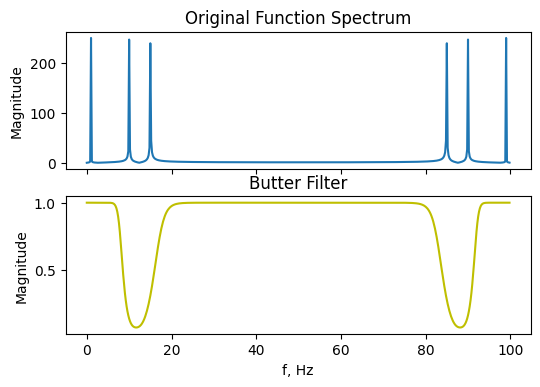

In [354]:
X = np.fft.fft(x)
f = np.arange(NumOfSamples) * fs / NumOfSamples

H_tpf = TF(f, 8 * f0, 17*f0, 9)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].set_title("Original Function Spectrum")
ax[0].plot(f, (np.abs(X)))

ax[1].set_title("Butter Filter")
ax[1].plot(f, (np.abs(H_tpf)), 'y')
ax[0].set_ylabel('Magnitude')
ax[1].set_ylabel('Magnitude')
ax[1].set_xlabel('f, Hz')

## *тут тоже осталась одна гармоника*

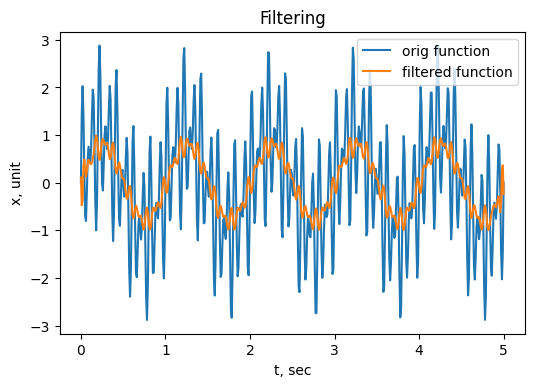

In [355]:
Y = H_tpf * X
y = np.real(np.fft.ifft(Y))
plt.title('Filtering')
plt.xlabel("t, sec")
plt.ylabel("x, unit")
plt.plot(t, x, label='orig function')
plt.plot(t, y, label='filtered function')
plt.legend(loc='best')